# Benchmarking DyGraph
Author: Tobias Famos
For the Seminar Data Science at University Fribourg

Imports

In [1]:
import pandas
from benchmark_helper import *
import matplotlib.pyplot as pyplot


## Measuring the effect of number of nodes
With a constant maximal Degree. The constant maximal degree ensures that the number of edges doesn't grow out of proportion.
Lets start with the following configuration file and up the number of nodes


In [2]:
def evaluate_configuration_list(config_list):
    results = []
    count = 0
    for config in config_list:
        output = time_dygraph_from_script(*config)
        results.append(output)
        count+=1
        print("Finished Number {} of {} configurations in {} seconds".format(count, len(config_list), output[0]))

    df = pandas.DataFrame(results, columns=["Execution Time", "Vertices Created", "Edges Created", "Average Degree", "Needed Vertices", "Edges per Second"])
    return df

In [3]:
def generate_plots(results):
    pyplot.plot(results["Edges Created"], results["Execution Time"])
    pyplot.ylabel('Execution Time (seconds)')
    pyplot.xlabel('Number of Edges Created')
    pyplot.show()
    pyplot.plot(results["Vertices Created"], results["Execution Time"])
    pyplot.ylabel("Execution Time (seconds)")
    pyplot.xlabel("Number of Vertices Created")
    pyplot.show()
    pyplot.plot(results["Edges Created"], results["Edges per Second"])
    pyplot.ylabel('Edges per Second')
    pyplot.xlabel('Number of Edges Created')
    pyplot.show()
    pyplot.plot(results["Vertices Created"], results["Edges per Second"])
    pyplot.ylabel("Edges per Second")
    pyplot.xlabel("Number of Vertices Created")
    pyplot.show()

# Evaluating Low Average Degree Graphs
Here we Evaluate the Growth of the runtime when creating Grphas with low average degrees

In [4]:
configuration_low_average_degree = [
    [1000, -6, 3, 10],
    [10000, -6, 3.7, 100],
    [100000, -6, 4.2, 400],
    [500000, -6, 5.6, 600],
    [1000000, -6, 6, 600],
]
results_low_degree = evaluate_configuration_list(configuration_low_average_degree)


Finished Number 1 of 5 configurations in 0.0332181453704834 seconds
Finished Number 2 of 5 configurations in 0.028920412063598633 seconds
Finished Number 3 of 5 configurations in 0.8188049793243408 seconds
Finished Number 4 of 5 configurations in 16.0355544090271 seconds
Finished Number 5 of 5 configurations in 73.13923478126526 seconds


In [5]:
results_low_degree

,Execution Time,Vertices Created,Edges Created,Average Degree,Needed Vertices,Edges per Second
0,0.033218,1000.0,562.0,1.12400,1035.0,16918.464102
1,0.028920,10000.0,5432.0,1.08640,5188.0,187825.816176
2,0.818805,100000.0,54616.0,1.09232,16924.0,66702.085819
3,16.035554,500000.0,288200.0,1.15280,405954.0,17972.562261
4,73.139235,1000000.0,583534.0,1.16707,1018284.0,7978.399032


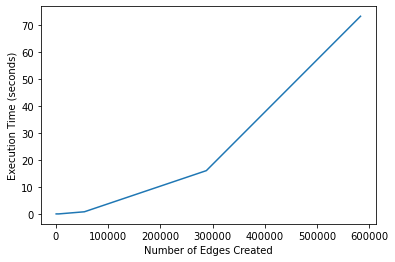

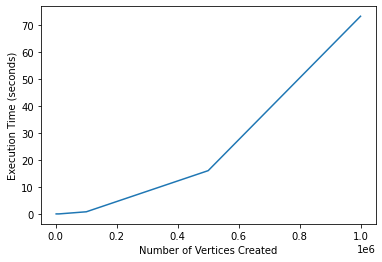

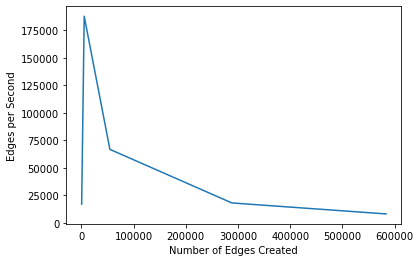

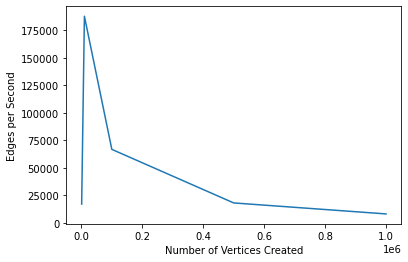

In [6]:
generate_plots(results_low_degree)

In [7]:
configurations_high_average_degree = [
    [1000, -6, 3, 100],
    [10000, -6, 3.8, 210],
    [100000, -6, 5, 2000],
]
results_high_degree = evaluate_configuration_list(configurations_high_average_degree)

Finished Number 1 of 3 configurations in 0.01808619499206543 seconds
Finished Number 2 of 3 configurations in 0.34123849868774414 seconds
Finished Number 3 of 3 configurations in 36.99790835380554 seconds


In [5]:
config_extrem_long = [
    [200000, -6, 7, 3000]
]
config_extrem_long = evaluate_configuration_list(config_extrem_long)

KeyboardInterrupt: 

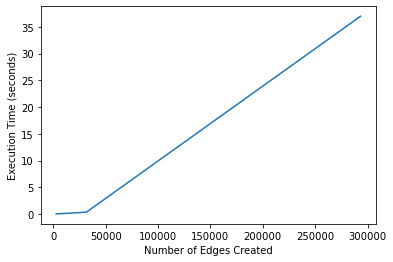

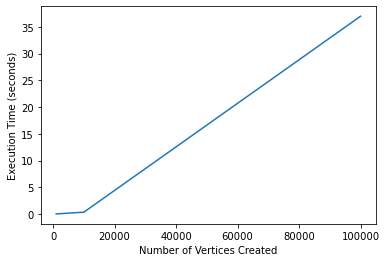

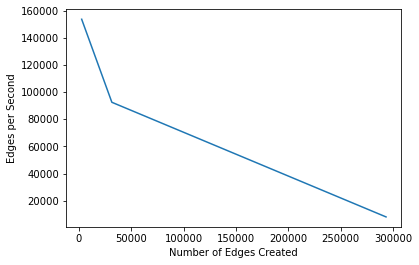

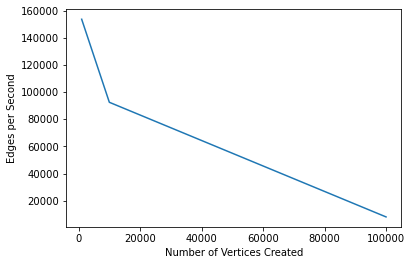

In [9]:
generate_plots(results_high_degree)

In [10]:
configurations_test = [
    [100, -6, 3, 10],
    [1000, -6, 3, 20],
    [2000, -6, 3, 30],
    [3000, -6, 3, 40],
    [4000, -6, 3, 50],
    [5000, -6, 3, 60],
]

In [ ]:
test_results = evaluate_configuration_list(configurations_test)
generate_plots(test_results)

# Visualize in one Graph
Visualize the two experiments in one graph

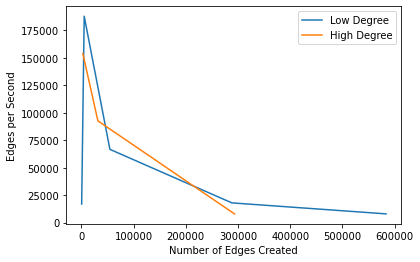

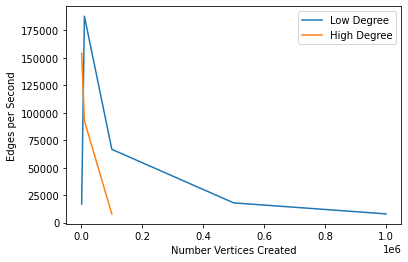

In [11]:
low_degree_x_edges_created = results_low_degree["Edges Created"]
high_degree_x_edges_created = results_high_degree["Edges Created"]

low_degree_edges_per_second = results_low_degree["Edges per Second"]
high_degree_edges_per_second = results_high_degree["Edges per Second"]

low_degree_vertices_created = results_low_degree["Vertices Created"]
high_degree_vertices_created = results_high_degree["Vertices Created"]

pyplot.plot(low_degree_x_edges_created, low_degree_edges_per_second, label="Low Degree")
pyplot.plot(high_degree_x_edges_created, high_degree_edges_per_second, label="High Degree")
pyplot.ylabel('Edges per Second')
pyplot.xlabel('Number of Edges Created')
pyplot.legend()
pyplot.show()

pyplot.plot(low_degree_vertices_created, low_degree_edges_per_second, label="Low Degree")
pyplot.plot(high_degree_vertices_created, high_degree_edges_per_second, label="High Degree")
pyplot.ylabel('Edges per Second')
pyplot.xlabel('Number Vertices Created')
pyplot.legend()
pyplot.show()

In [14]:
(results_high_degree)

,Execution Time,Vertices Created,Edges Created,Average Degree,Needed Vertices,Edges per Second
0,0.018086,1000.0,2785.0,5.57000,1108.0,153984.848733
1,0.341238,10000.0,31608.0,6.32160,7064.0,92627.297686
2,36.997908,100000.0,293347.0,5.86694,103172.0,7928.745517
